# Step 1: Data Cleaning and Exploratory Data Analysis (EDA)

## Overview Summary
- **Raw data**: 48,000 transactions from a North American (NA) retail tech company (2024–2025)  
- **After cleaning**: 19,579 valid transactions from 1,628 NA customers  
- **Goal**: Prepare high-quality data for customer segmentation

## Workflow

1. **Load and understand the data** – Explore structure and quality  
2. **Clean the data** – Remove invalid transactions  
3. **Perform EDA** – Identify patterns and trends  
4. **Visualize** – Highlight key insights  
5. **Export cleaned data** – Prepare for the next step  

## About the Dataset

**Source**: North American online retail company specializing in applications and technology software  
**Time period**: 4/2024 – 10/2025  
**Scope**: Global transactions with a focus on the North American market  

### Key Data Fields

| Field                | Description                     | Example                                   |
|----------------------|---------------------------------|--------------------------------------------|
| `event_id`           | Transaction ID                  | DDF4B24A8C91                               |
| `event_date`         | Transaction timestamp           | 2025-06-21 10:03:00                        |
| `customer_id`        | Customer ID                     | CUST0003443                                |
| `product_id`         | Product code                    | PROD0065                                   |
| `product_name`       | Product name                    | Microsoft Copilot for Office Monthly       |
| `vendor_name`        | Vendor                          | Microsoft                                  |
| `country_name`       | Country                         | Canada                                     |
| `region`             | Region                          | NA                                         |
| `quantity`           | Quantity                        | 1                                          |
| `unit_price_local`   | Unit price (local currency)     | 19.00                                      |
| `net_revenue_local`  | Net revenue after discount      | 19.95                                      |
| `discount_local`     | Discount amount                 | 0.0                                        |
| `is_refunded`        | Refunded or not                 | False                                      |


In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import sys
sys.path.append('C:/Users/HP/Downloads/e_commerce_Dataset/e_commerce_project/src')

from clustering_library import DataCleaner, DataVisualizer
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# setting style for plots
visualizer = DataVisualizer()

## Load dataset

In [ ]:
# load data
data_path = "https://raw.githubusercontent.com/phuthiendao/e_commerce/refs/heads/main/data/raw/e_commerce.csv"

# create data cleaner instance and load data
cleaner = DataCleaner(data_path)
df = cleaner.load_data()

# display first few rows of the dataframe
df.head()

Loaded data shape: (48000, 13)
Total records: 48,000


,event_id,event_date,customer_id,product_id,product_name,vendor_name,country_name,region,quantity,unit_price_local,net_revenue_local,discount_local,is_refunded
0,DDF4B24A8C91,2025-06-21 10:03:00,CUST0003443,PROD0065,Microsoft Copilot for Office Monthly,Microsoft,Canada,NA,1,19.00,19.95,0.0,False
1,0398469128BC,2025-05-02 00:58:00,CUST0000141,PROD0061,Notion AI Monthly,Notion,Philippines,APAC,10,10.00,115.00,0.0,False
2,C909DE7C5803,2025-03-13 23:30:00,CUST0001684,PROD0100,Azure AI Studio Annual Pro,Microsoft,United Kingdom,EU,10,259.24,3110.88,0.0,False
3,D480F9C80E25,2024-06-23 15:55:00,CUST0000484,PROD0050,Zendesk Suite Team Annual,Zendesk,Brazil,LATAM,10,130.00,1495.00,0.0,False
4,4F8DA363D626,2024-09-09 15:51:00,CUST0002069,PROD0035,Miro Business Monthly,Other,Philippines,APAC,15,16.00,276.00,0.0,False


In [4]:
# Check basic information about the dataset
print("General Information:")
print(f"- Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")
print(f"- Missing values: {df.isnull().sum().sum():,} values")
print(f"- Unique customers: {df['customer_id'].nunique():,}\n")

df.info()


General Information:
- Shape: 48,000 rows x 13 columns
- Missing values: 0 values
- Unique customers: 4,000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_id           48000 non-null  object        
 1   event_date         48000 non-null  datetime64[ns]
 2   customer_id        48000 non-null  object        
 3   product_id         48000 non-null  object        
 4   product_name       48000 non-null  object        
 5   vendor_name        48000 non-null  object        
 6   country_name       48000 non-null  object        
 7   region             48000 non-null  object        
 8   quantity           48000 non-null  int64         
 9   unit_price_local   48000 non-null  float64       
 10  net_revenue_local  48000 non-null  float64       
 11  discount_local     48000 non-null  float64       
 12  is_refu

## Data Cleaning

We clean the dataset by performing the following steps:

1. Verify and fill in missing region values for North American customers  
2. Remove canceled or refunded transactions  
3. Filter and keep only North American (NA) customers  
4. Remove records with missing `customer_id`  
5. Remove entries with invalid `quantity` or `unit_price_local`  


In [5]:
df_na = cleaner.clean_data()

C:\Users/HP/Downloads/e_commerce_Dataset/e_commerce_project/src\clustering_library.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_na.dropna(subset=["customer_id"], inplace=True)


In [6]:
display(df_na.head())
df_na.info()

,event_id,event_date,customer_id,product_id,product_name,vendor_name,country_name,region,quantity,unit_price_local,net_revenue_local,discount_local,is_refunded
0,DDF4B24A8C91,2025-06-21 10:03:00,CUST0003443,PROD0065,Microsoft Copilot for Office Monthly,Microsoft,Canada,NA,1,19.0,19.95,0.0,False
23,BD9FEBEC9B3F,2025-05-05 09:33:00,CUST0002954,PROD0018,GitHub Copilot Business Annual,GitHub,United States,NA,5,228.0,1140.00,0.0,False
24,CA766F5D217C,2024-09-09 04:59:00,CUST0000463,PROD0007,Team Seats Addâon Monthly,Other,United States,NA,1,9.0,9.00,0.0,False
25,91C029DA41E7,2025-09-07 03:01:00,CUST0002656,PROD0041,Canva Pro Monthly,Canva,United States,NA,5,12.0,60.00,0.0,False
26,FD1255BBCA9C,2025-05-24 15:45:00,CUST0001734,PROD0042,Canva Pro Annual,Canva,United States,NA,10,120.0,1200.00,0.0,False


<class 'pandas.core.frame.DataFrame'>
Index: 19176 entries, 0 to 47999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_id           19176 non-null  object        
 1   event_date         19176 non-null  datetime64[ns]
 2   customer_id        19176 non-null  object        
 3   product_id         19176 non-null  object        
 4   product_name       19176 non-null  object        
 5   vendor_name        19176 non-null  object        
 6   country_name       19176 non-null  object        
 7   region             19176 non-null  object        
 8   quantity           19176 non-null  int64         
 9   unit_price_local   19176 non-null  float64       
 10  net_revenue_local  19176 non-null  float64       
 11  discount_local     19176 non-null  float64       
 12  is_refunded        19176 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(7)
mem

In [7]:
# Create time features for analysis
df_na = cleaner.create_time_features()

df_na = cleaner.df_na

print("Data Cleaning Results:")
print(f"- Original data: {df.shape[0]:,} transactions")
print(f"- Clean data: {df_na.shape[0]:,} transactions")
print(f"- Removed: {df.shape[0] - df_na.shape[0]:,} transactions ({((df.shape[0] - df_na.shape[0]) / df.shape[0] * 100):.1f}%)")
print(f"- North American (NA) customers: {df_na['customer_id'].nunique():,}")

df_na.head()


Data Cleaning Results:
- Original data: 48,000 transactions
- Clean data: 19,176 transactions
- Removed: 28,824 transactions (60.1%)
- North American (NA) customers: 1,628


,event_id,event_date,customer_id,product_id,product_name,vendor_name,country_name,region,quantity,unit_price_local,net_revenue_local,discount_local,is_refunded,DayOfWeek,HourOfDay
0,DDF4B24A8C91,2025-06-21 10:03:00,CUST0003443,PROD0065,Microsoft Copilot for Office Monthly,Microsoft,Canada,NA,1,19.0,19.95,0.0,False,5,10
23,BD9FEBEC9B3F,2025-05-05 09:33:00,CUST0002954,PROD0018,GitHub Copilot Business Annual,GitHub,United States,NA,5,228.0,1140.00,0.0,False,0,9
24,CA766F5D217C,2024-09-09 04:59:00,CUST0000463,PROD0007,Team Seats Addâon Monthly,Other,United States,NA,1,9.0,9.00,0.0,False,0,4
25,91C029DA41E7,2025-09-07 03:01:00,CUST0002656,PROD0041,Canva Pro Monthly,Canva,United States,NA,5,12.0,60.00,0.0,False,6,3
26,FD1255BBCA9C,2025-05-24 15:45:00,CUST0001734,PROD0042,Canva Pro Annual,Canva,United States,NA,10,120.0,1200.00,0.0,False,5,15


## Basic Exploratory Analysis

After cleaning the data, we explore patterns and insights in customer behavior.


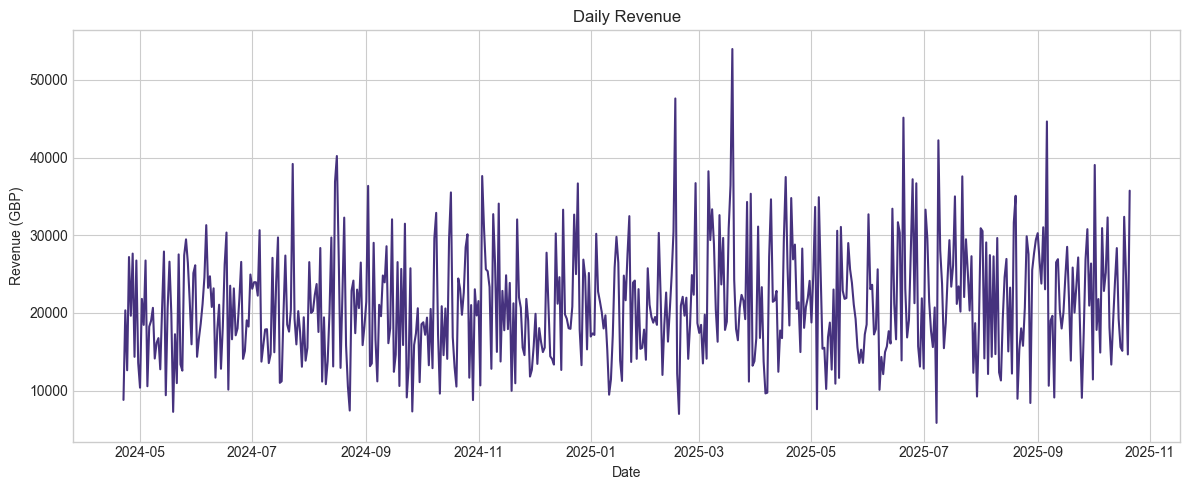

C:\Users/HP/Downloads/e_commerce_Dataset/e_commerce_project/src\clustering_library.py:1176: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key="event_date", freq="M"))["net_revenue_local"].sum()


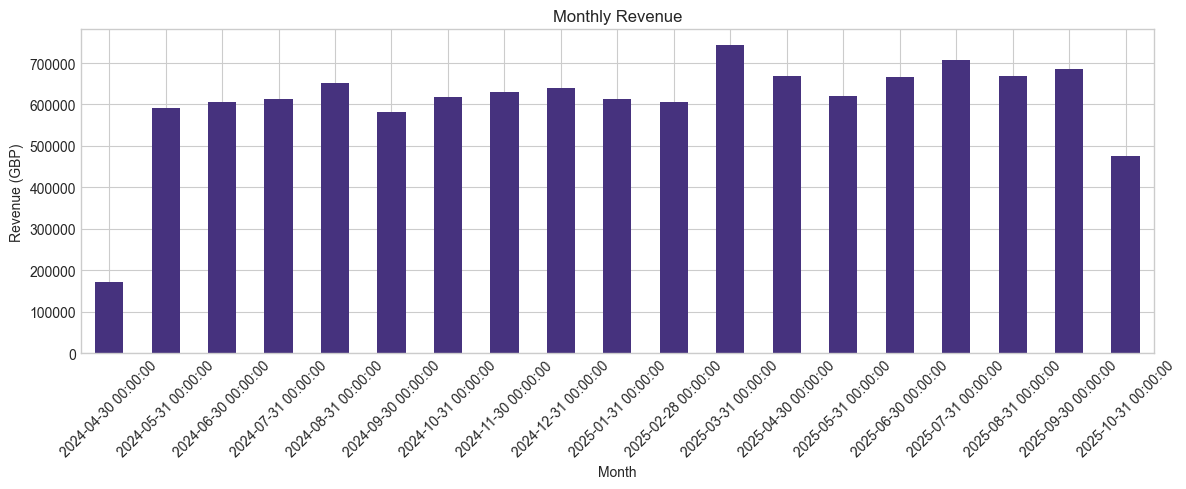

In [8]:
# analysis and visualization time-based revenue
visualizer.plot_revenue_over_time(df_na)

### Purchase Time Patterns


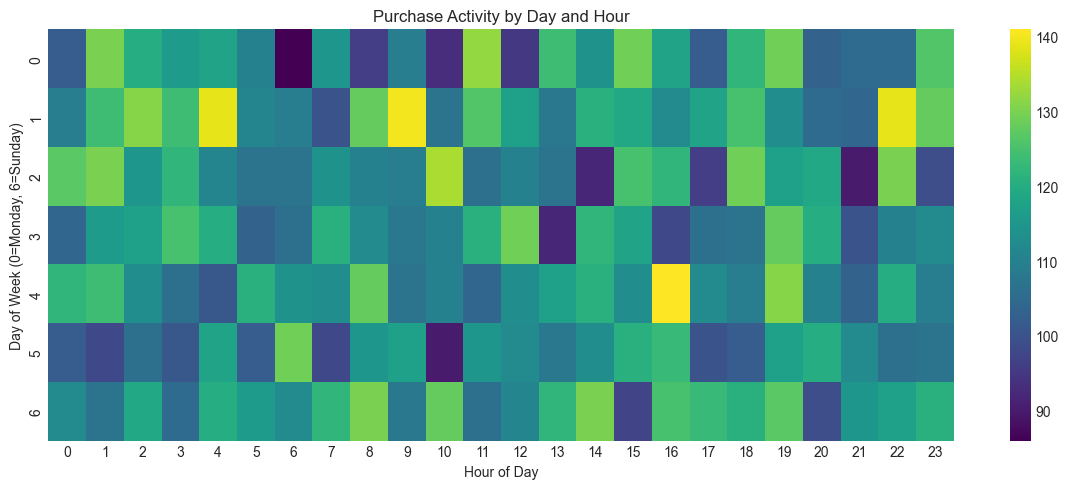

In [9]:
# analyze time patterns in purchasing behavior
visualizer.plot_time_patterns(df_na)

## Product Analysis


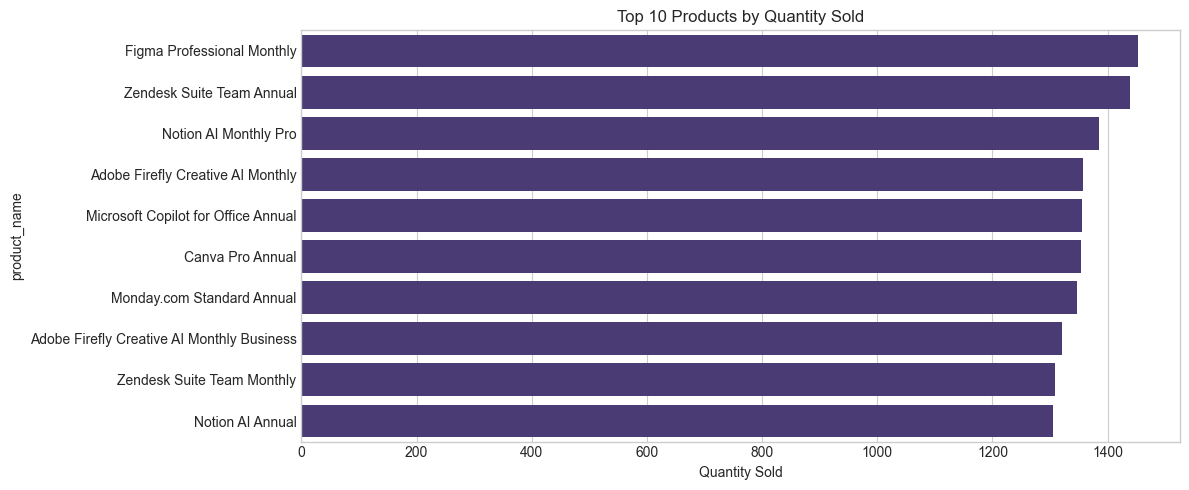

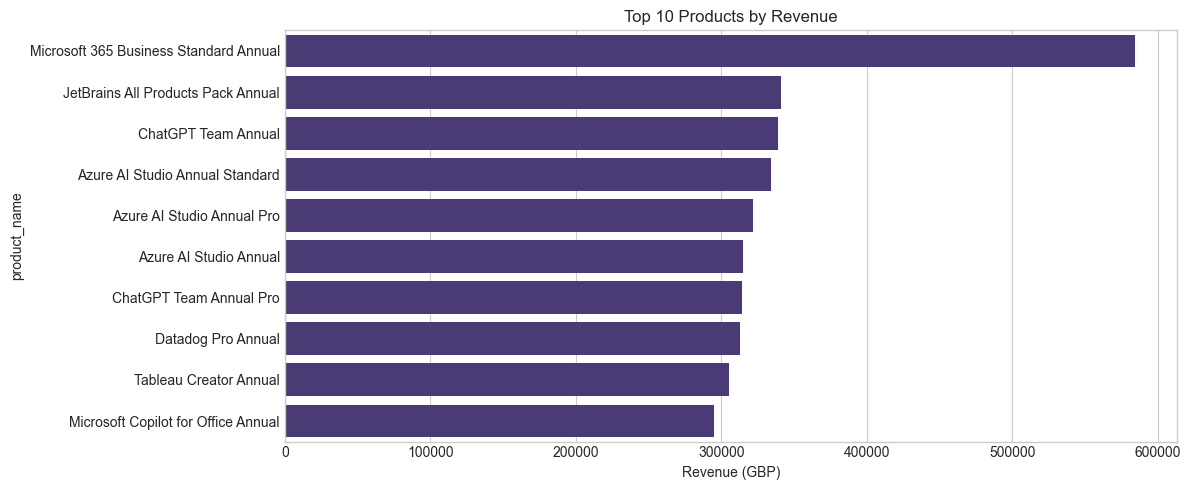

In [10]:
# top products analysis by quantity and revenue
visualizer.plot_product_analysis(df_na)

## Customer Analysis


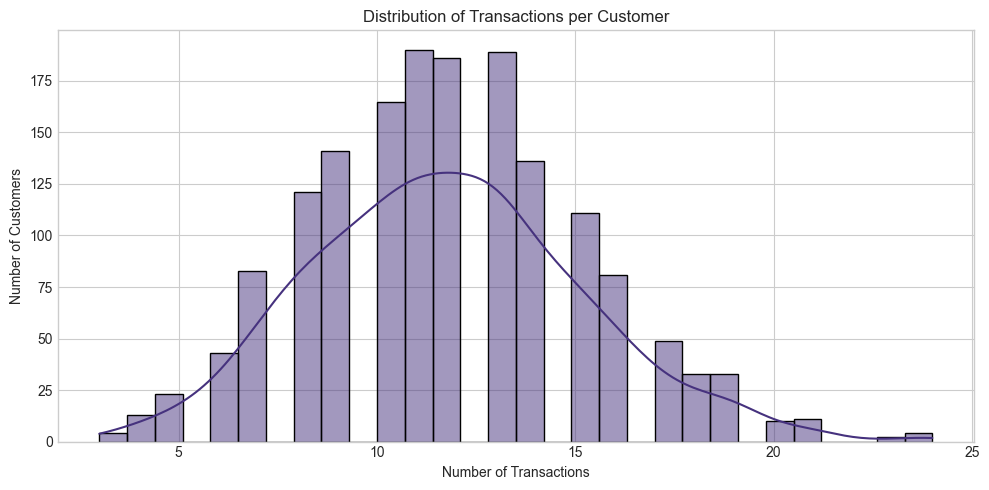

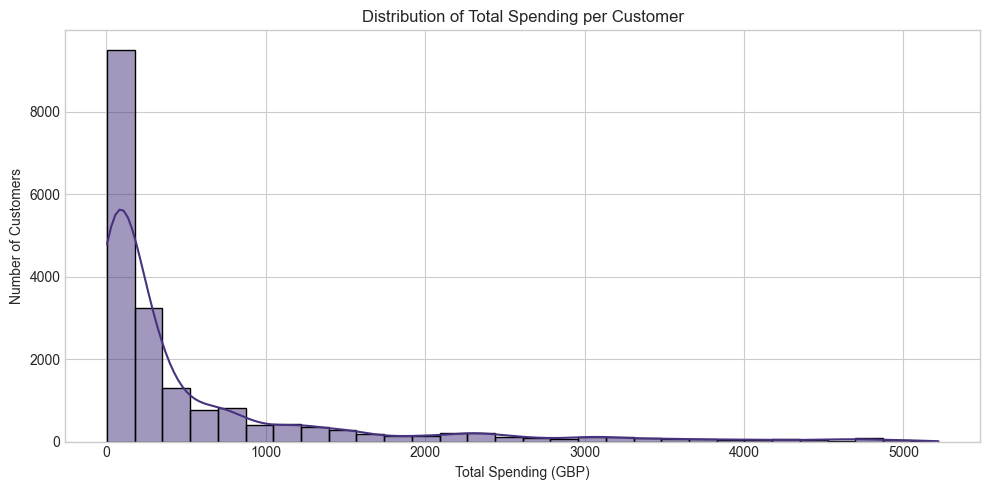

In [11]:
# analyze customer distribution
visualizer.plot_customer_distribution(df_na)

In [12]:
# Customer spending analysis
spend_per_customer = df_na.groupby("customer_id")["net_revenue_local"].sum()
transactions_per_customer = df_na.groupby("customer_id")["event_id"].nunique()

print("Customer Behavior Analysis:")
print(f"- Average spending: {spend_per_customer.mean():.2f}")
print(f"- Median spending: {spend_per_customer.median():.2f}")
print(f"- Average number of transactions: {transactions_per_customer.mean():.1f} times")

spend_per_customer.describe()


Customer Behavior Analysis:
- Average spending: 7098.71
- Median spending: 6375.73
- Average number of transactions: 11.8 times


count     1628.000000
mean      7098.710424
std       4244.379216
min        255.030000
25%       3899.322500
50%       6375.725000
75%       9495.815000
max      24645.170000
Name: net_revenue_local, dtype: float64

## Preparing for RFM Analysis

RFM stands for:  
- **R**ecency: How recently did the customer make a purchase?  
- **F**requency: How often do they make purchases?  
- **M**onetary: How much money have they spent?  


In [13]:
# Calculate RFM metrics (Recency, Frequency, Monetary)
rfm_data = cleaner.calculate_rfm()

print("RFM Analysis:")
print(f"- Average Recency: {rfm_data['Recency'].mean():.0f} days")
print(f"- Average Frequency: {rfm_data['Frequency'].mean():.1f} transactions")
print(f"- Average Monetary: ${rfm_data['Monetary'].mean():.2f}")

rfm_data.head(10)


RFM Analysis:
- Average Recency: 45 days
- Average Frequency: 11.8 transactions
- Average Monetary: $7098.71


,Recency,Frequency,Monetary
customer_id,,,
CUST0000005,192,10,2427.68
CUST0000006,36,14,14166.85
CUST0000009,60,11,12077.81
CUST0000011,33,14,6540.37
CUST0000013,184,4,462.00
CUST0000014,12,14,13465.97
CUST0000016,13,12,5425.03
CUST0000019,3,16,13358.08
CUST0000020,69,15,9705.98


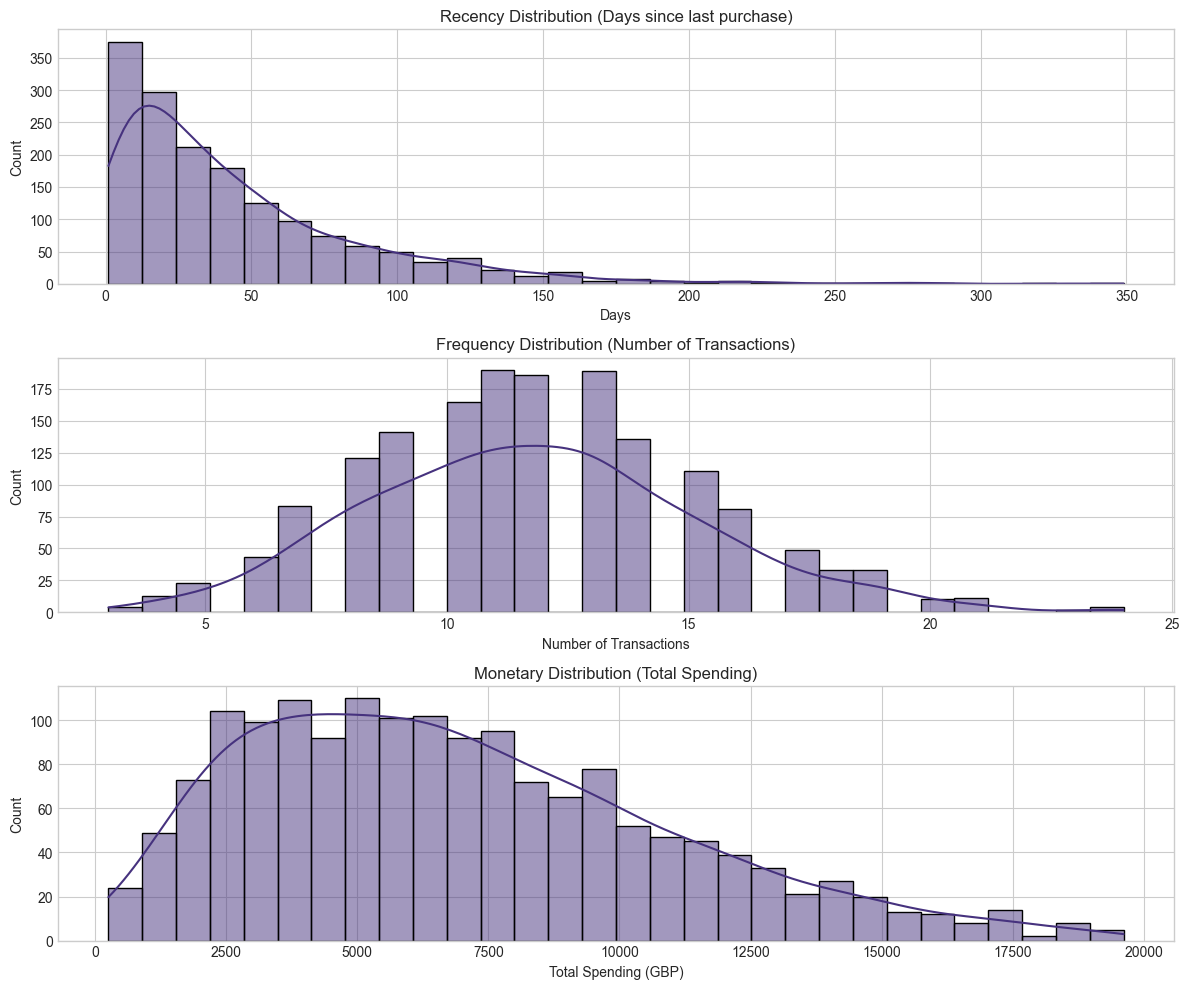

In [14]:
# distribution plots for RFM 
visualizer.plot_rfm_analysis(rfm_data)

## Save Cleaned Data


In [15]:
# Save cleaned data
cleaner.save_cleaned_data()

print("Data has been successfully saved:")
print("- File: cleaned_na_data.csv")
print(f"- Size: {df_na.shape[0]:,} rows")
print("- Ready for the feature engineering step")


Saved cleaned data: ../data/processed/cleaned_na_data.csv
Data has been successfully saved:
- File: cleaned_na_data.csv
- Size: 19,176 rows
- Ready for the feature engineering step


## Summary

In this notebook, we:

1. **Loaded the data** from the e_commerce dataset  
2. **Cleaned the data** by:
   - Checking valid values for the NA region  
   - Removing canceled transactions  
   - Filtering to include only customers in the NA region  
   - Dropping records with missing `customer_id`  
   - Removing invalid quantity/price values  
3. **Explored the data** through:
   - Revenue trends over time  
   - Purchase timing patterns (day/hour)  
   - Top products by quantity and revenue  
   - Customer behavior analysis  
   - RFM analysis (Recency, Frequency, Monetary)  
4. **Saved the cleaned dataset** for feature creation  

### Key Findings:
- The dataset covers the period from **April 2024 to October 2025**  
- After cleaning, we have **19,579** transactions from **1,628** unique customers in the North American (NA) region  
- Revenue shows an **upward trend** over time  
- Purchases occur across various hours and weekdays  
- Customer spending and transaction frequency vary significantly  
